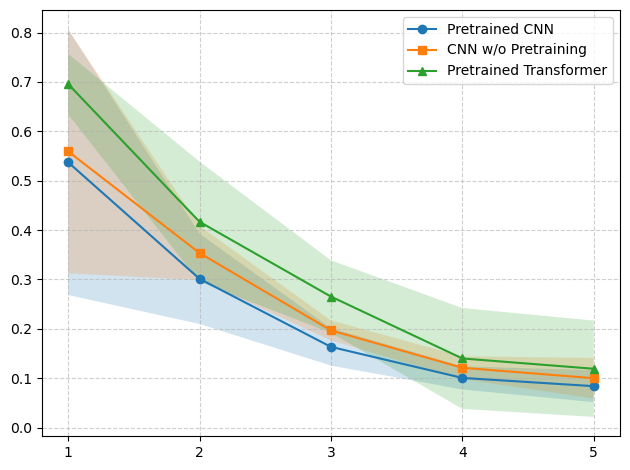

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_with_std(shots, means, stds, label, marker):
    lower = np.clip(means - stds, 0, None)   # ensure no negatives
    upper = means + stds
    plt.plot(shots, means, marker+'-', label=label)
    plt.fill_between(shots, lower, upper, alpha=0.2)
    
means_model1 = []
stds_model1 = []
for j in range(1,6):
    a = []
    for i in range(1,6):
        b = np.load(f'./results/burgers/cnn/pretrain/super-fidelity/trail{i}/{j}-instances/eval_rmse.npy').mean(axis=0)
        a.append(b)
    a = np.stack(a,axis=0)
    means_model1.append(a.mean(axis=0))
    stds_model1.append(a.std(axis=0))
means_model1 = np.stack(means_model1,axis=0)
stds_model1 = np.stack(stds_model1,axis=0)
means_model2 = []
stds_model2 = []
for j in range(1,6):
    a = []
    for i in range(1,6):
        b = np.load(f'./results/burgers/cnn/no-pretrain/super-fidelity/trail{i}/{j}-instances/eval_rmse.npy').mean(axis=0)
        a.append(b)
    a = np.stack(a,axis=0)
    means_model2.append(a.mean(axis=0))
    stds_model2.append(a.std(axis=0))
means_model2 = np.stack(means_model2,axis=0)
stds_model2 = np.stack(stds_model2,axis=0)
means_model3 = []
stds_model3 = []
for j in range(1,6):
    a = []
    for i in range(1,6):
        b = np.load(f'./results/burgers/transformer/super-fidelity/trail{i}/{j}-instances/eval_rmse.npy').mean(axis=0)
        a.append(b)
    a = np.stack(a,axis=0)
    means_model3.append(a.mean(axis=0))
    stds_model3.append(a.std(axis=0))
means_model3 = np.stack(means_model3,axis=0)
stds_model3 = np.stack(stds_model3,axis=0)
norm = 0.05272280893342181
shots=[1,2,3,4,5]
# Plot all three models
plot_with_std(shots, means_model1/norm, stds_model1/norm, "Pretrained CNN", "o")
plot_with_std(shots, means_model2/norm, stds_model2/norm, "CNN w/o Pretraining", "s")
plot_with_std(shots, means_model3/norm, stds_model3/norm, "Pretrained Transformer", "^")

plt.xticks([1,2,3,4,5])
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()